In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [22]:
df = pd.read_csv('WineQT.csv')

In [23]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1    

In [24]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None


In [25]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


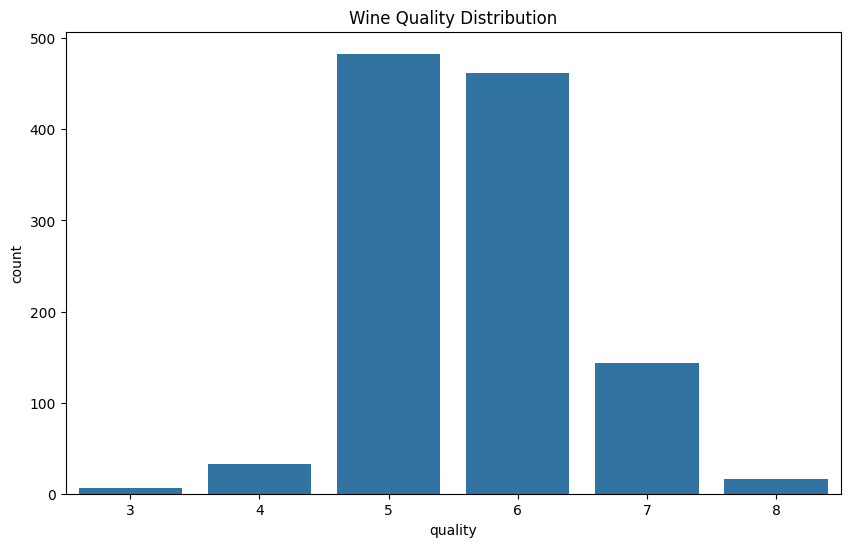

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df)
plt.title('Wine Quality Distribution')
plt.show()

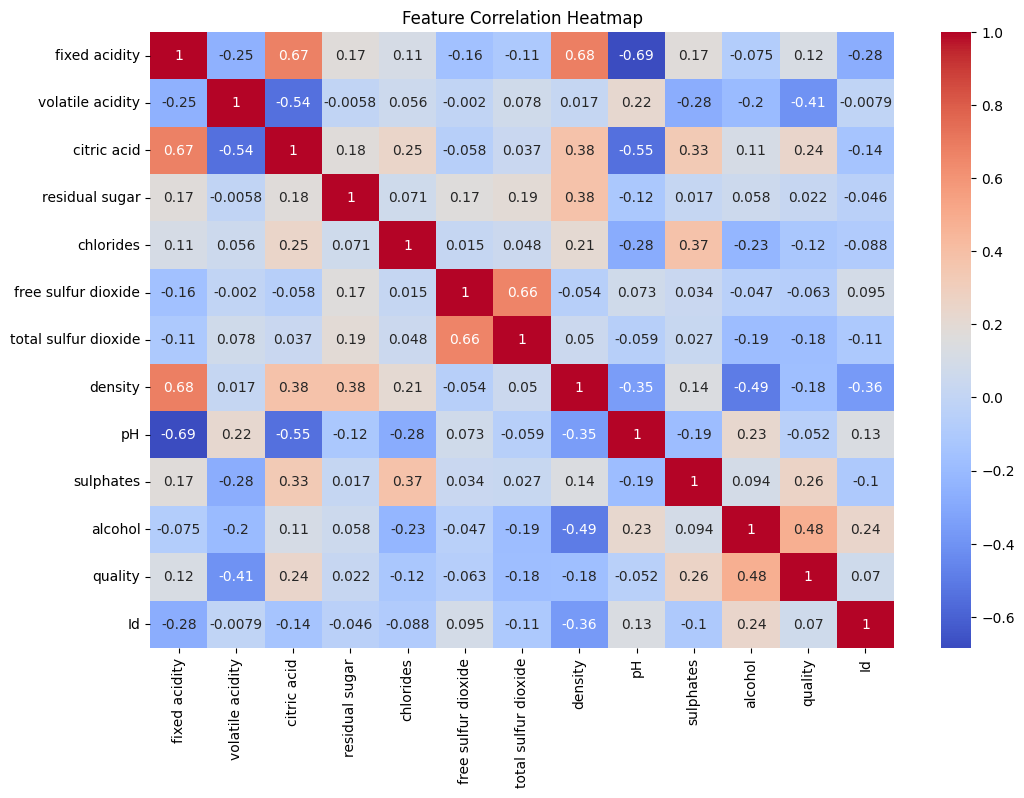

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

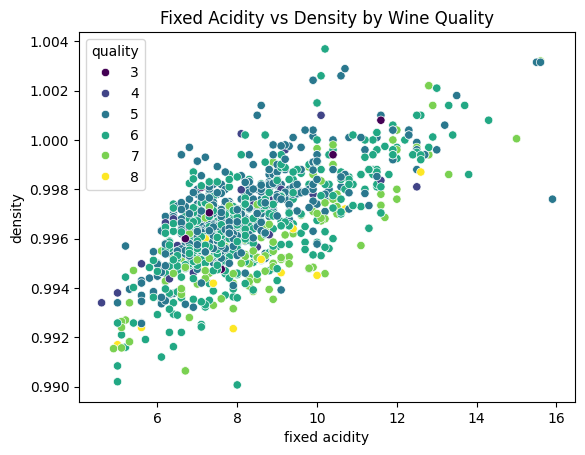

In [28]:
sns.scatterplot(data=df, x='fixed acidity', y='density', hue='quality', palette='viridis')
plt.title('Fixed Acidity vs Density by Wine Quality')
plt.show()

In [29]:
features = df.drop("quality", axis=1)
target = df["quality"]

In [30]:
target = target.apply(lambda q: 1 if q >= 7 else 0)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [32]:
def evaluate_model(model, name):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf, "Random Forest")


Random Forest Results:
Accuracy: 0.9344978165938864
Confusion Matrix:
 [[196   5]
 [ 10  18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       201
           1       0.78      0.64      0.71        28

    accuracy                           0.93       229
   macro avg       0.87      0.81      0.83       229
weighted avg       0.93      0.93      0.93       229



In [35]:
sgd = SGDClassifier(random_state=42)
evaluate_model(sgd, "Stochastic Gradient Descent")


Stochastic Gradient Descent Results:
Accuracy: 0.834061135371179
Confusion Matrix:
 [[179  22]
 [ 16  12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90       201
           1       0.35      0.43      0.39        28

    accuracy                           0.83       229
   macro avg       0.64      0.66      0.65       229
weighted avg       0.85      0.83      0.84       229



In [36]:
svc = SVC(kernel='rbf', C=1, gamma='scale')
evaluate_model(svc, "Support Vector Classifier")


Support Vector Classifier Results:
Accuracy: 0.8995633187772926
Confusion Matrix:
 [[197   4]
 [ 19   9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       201
           1       0.69      0.32      0.44        28

    accuracy                           0.90       229
   macro avg       0.80      0.65      0.69       229
weighted avg       0.89      0.90      0.88       229



In [37]:
def predict_quality(model, scaler):
    print("\nEnter the values for the following features:")
    user_input = {}

    for col in df.drop("quality", axis=1).columns:
        while True:
            try:
                value = float(input(f"{col}: "))
                user_input[col] = value
                break
            except ValueError:
                print("Invalid input. Please enter a number.")

    user_df = pd.DataFrame([user_input])

    user_input_scaled = scaler.transform(user_df)

    prediction = model.predict(user_input_scaled)

    if prediction[0] == 1:
        print("\nPredicted Quality: High (>= 7)")
    else:
        print("\nPredicted Quality: Low (< 7)")


predict_quality(rf, scaler)



Enter the values for the following features:
fixed acidity: 1
volatile acidity: 8
citric acid: 9
residual sugar: 6
chlorides: 1
free sulfur dioxide: 4
total sulfur dioxide: 7
density: 9
pH: 5
sulphates: 9
alcohol: 1
Id: 1

Predicted Quality: Low (< 7)
